In [1]:
"""
Code from: https://github.com/mlarocca/AlgorithmsAndDataStructuresInAction/blob/master/Python/mlarocca/notebooks/Huffman_profiling.ipynb

I manually copied the code to refresh my memory with pandas.
"""

import os 
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib notebook

In [3]:
STATS_HEAP = os.path.join("..", "profile", "data", "stats_heap.csv")
STATS_HEAPIFY = os.path.join("..", "profile", "data", "stats_heap.csv")

In [9]:
def plot_method_stats(df: pd.DataFrame, method_name: str, time_field: str):
    df_method = df[df["method_name"] == method_name]
    branching_factors = df_method["branching_factor"].unique()
    data = [df_method[df_method["branching_factor"] == b][time_field] for b in branching_factors]

    fig, ax = plt.subplots()

    ax.set_title(method_name, fontsize=16)
    ax.set_xlabel("branching_factor")
    ax.set_ylabel("running_time")

    plt.boxplot(x=data, labels=branching_factors, showfliers=False)
    plt.show()


def plot_test_case_stats(df: pd.DataFrame, test_case: str, time_field: str = "cumulative_time"):
    df_test_case = df[df["test_case"] == test_case]
    method_names = df_test_case["method_name"].unique()

    for method_name in method_names:
        plot_method_stats(df_test_case, method_name, time_field)


def plot_method_mean(df: pd.DataFrame, method_name: str, time_field: str):
    df_method = df[df["method_name"] == method_name]
    branching_factors = df_method["branching_factor"].unique()
    data = df_method.groupby("branching_factor").mean().reset_index()

    fig, ax = plt.subplots()

    ax.set_title(method_name, fontsize=16)
    ax.set_xlabel("branching_factor")
    ax.set_ylabel("running_time")

    plt.plot(branching_factors, data[time_field])
    plt.show()


def plot_test_case_means(df: pd.DataFrame, test_case: str, time_field: str = "cumulative_time"):
    df_test_case = df[df["test_case"] == test_case]
    method_names = df_test_case["method_name"].unique()

    for method_name in method_names:
        plot_method_mean(df_test_case, method_name, time_field)

In [5]:
df = pd.read_csv(STATS_HEAP)

<IPython.core.display.Javascript object>


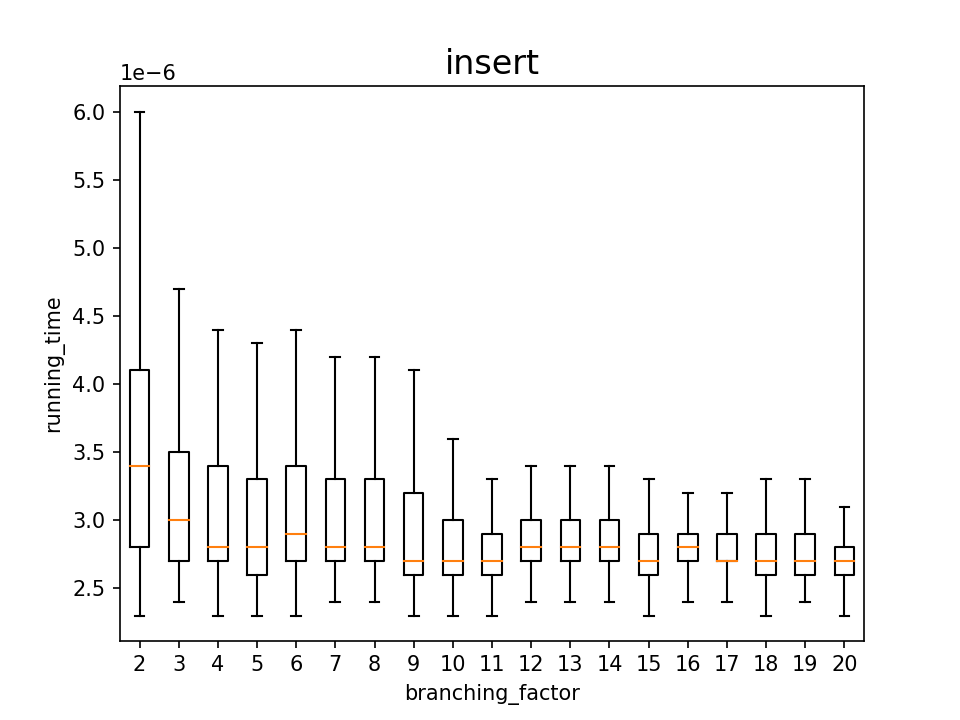

<IPython.core.display.Javascript object>


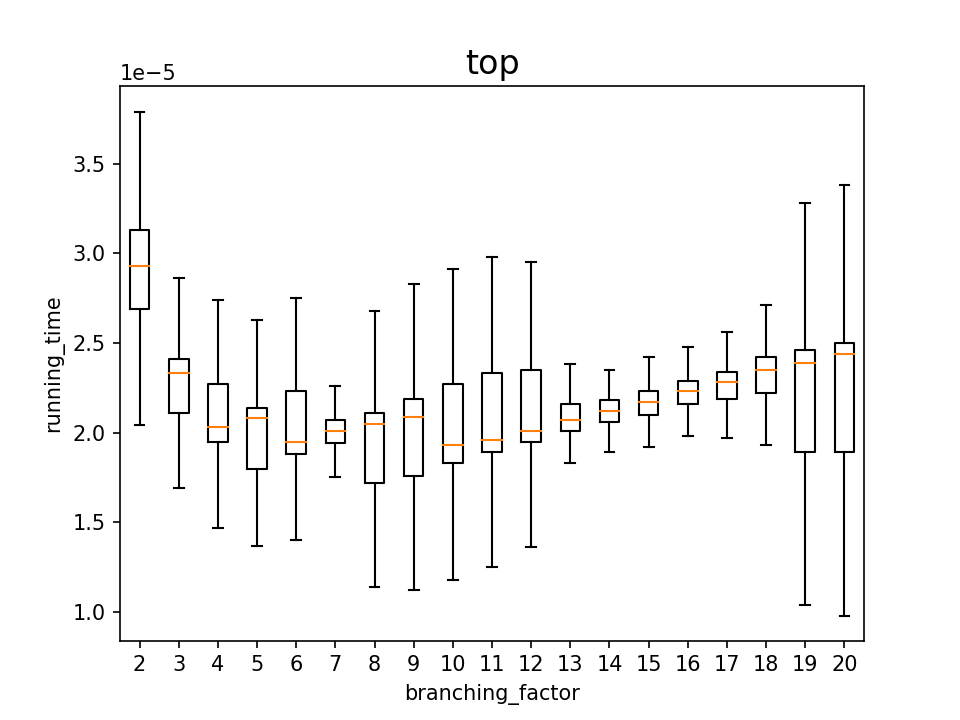

In [7]:
plot_test_case_stats(df, "heap")

<IPython.core.display.Javascript object>


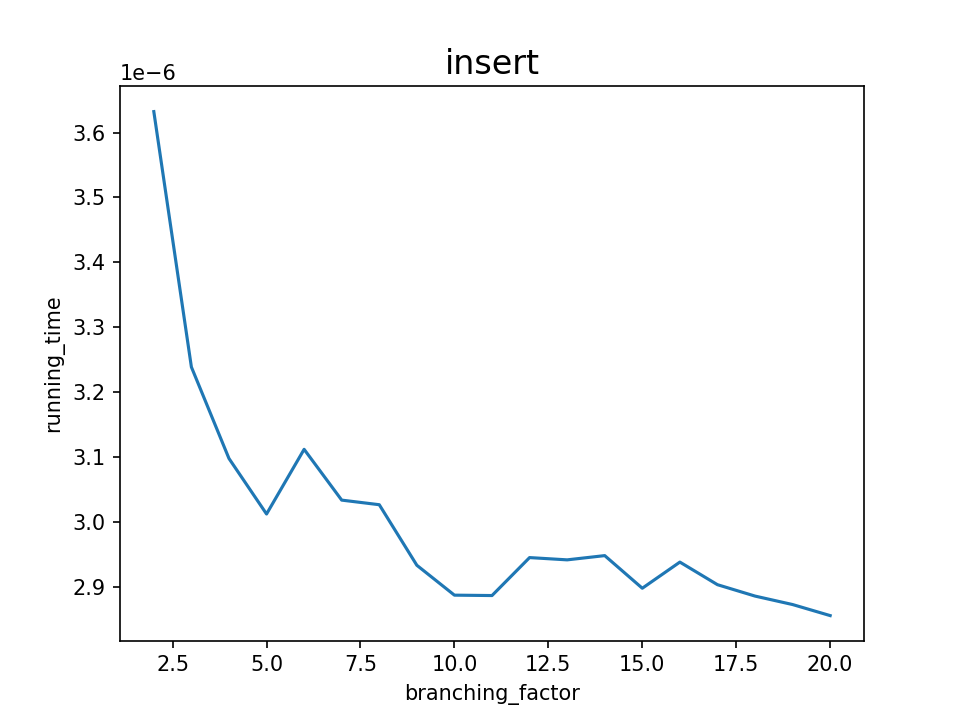

<IPython.core.display.Javascript object>


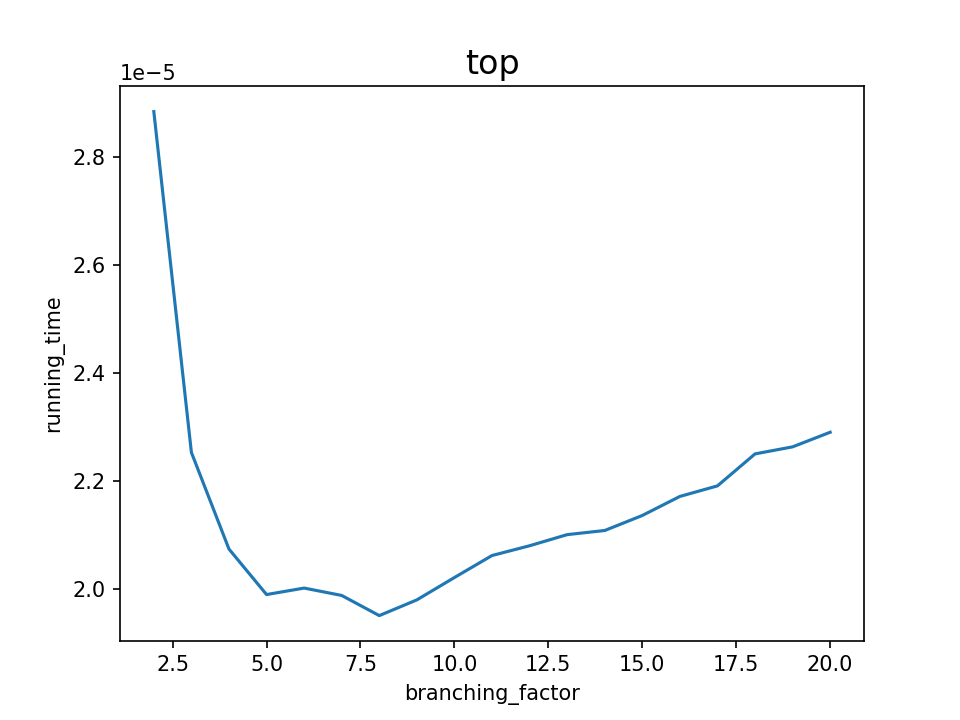

In [10]:
plot_test_case_means(df, "heap")

In [11]:
dfy = pd.read_csv(STATS_HEAPIFY)

<IPython.core.display.Javascript object>


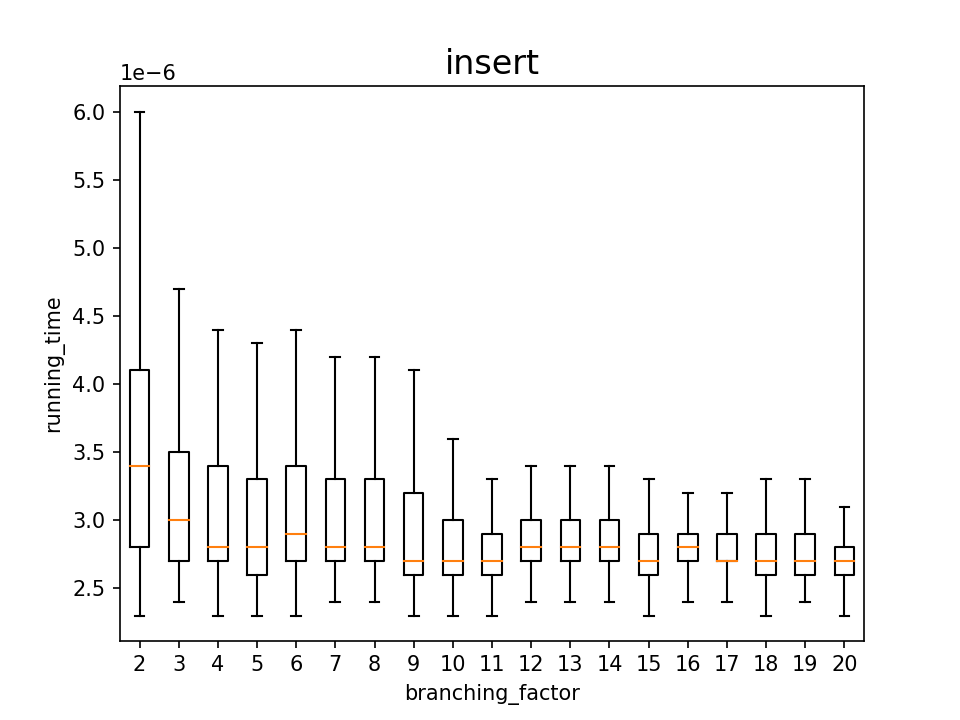

<IPython.core.display.Javascript object>


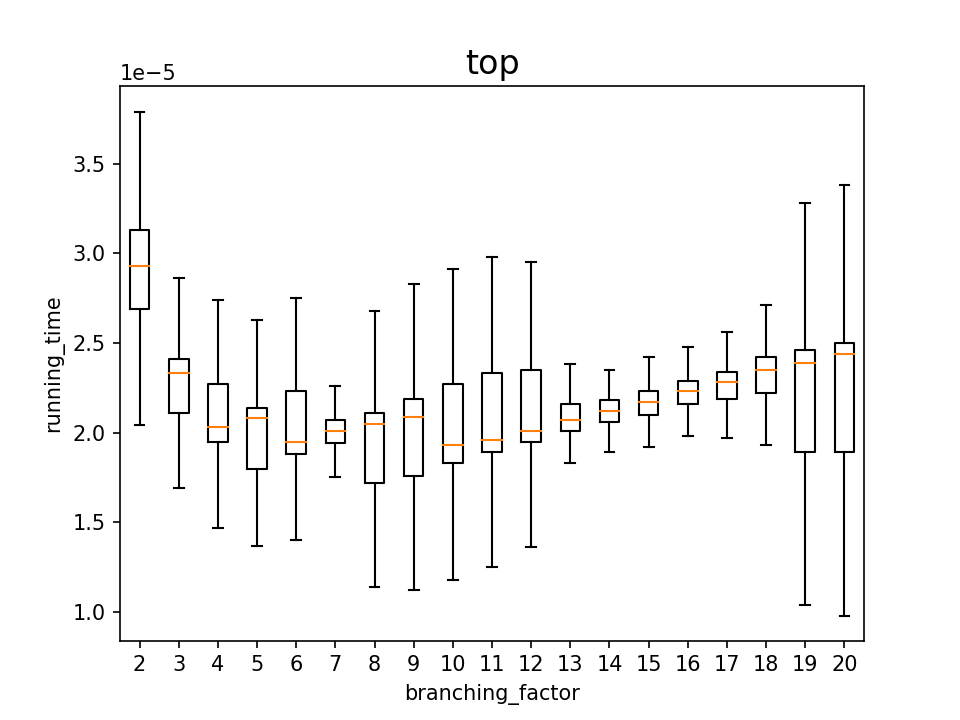

In [13]:
plot_test_case_stats(dfy, "heap")

<IPython.core.display.Javascript object>


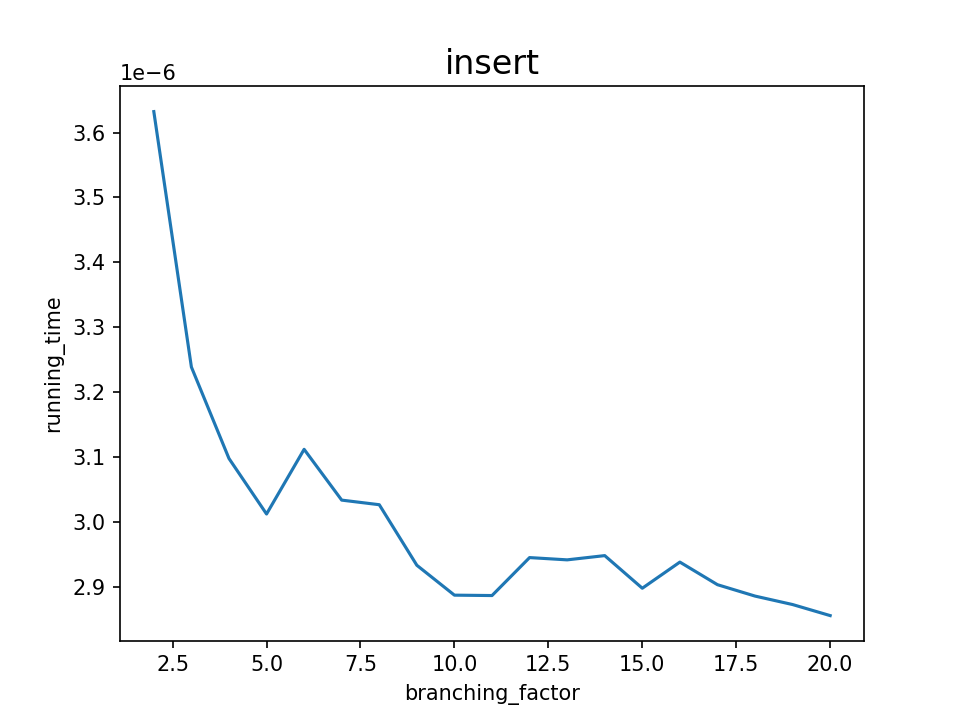

<IPython.core.display.Javascript object>


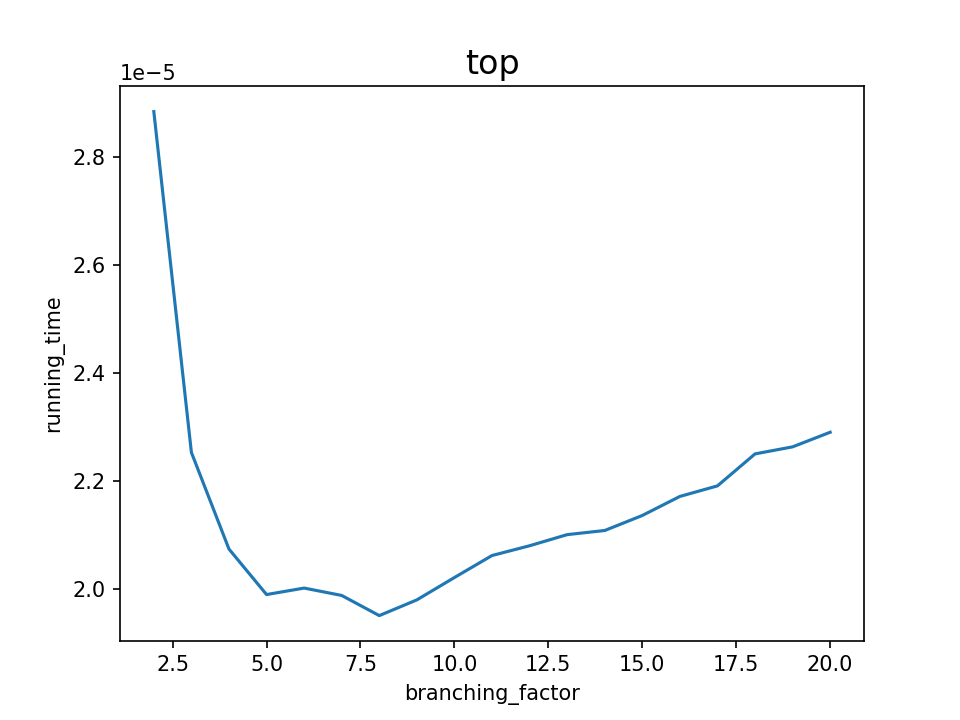

In [12]:
plot_test_case_means(dfy, "heap", "per_call_time")